In [9]:
# load package
from cryptory import Cryptory
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
np.set_printoptions(suppress=True)

In [10]:
# initialise object 
# pull data from start of 2017 to present day
my_cryptory = Cryptory(from_date = "2017-01-01")

# get historical bitcoin prices from coinmarketcap
my_cryptory.extract_coinmarketcap("bitcoin").head()

,date,open,high,low,close,volume,marketcap
0,2019-05-04,5769.20,5886.89,5645.47,5831.17,17567780766,103112021259
1,2019-05-03,5505.55,5865.88,5490.20,5768.29,18720780006,101986240859
2,2019-05-02,5402.42,5522.26,5394.22,5505.28,14644460907,97330112147
3,2019-05-01,5350.91,5418.00,5347.65,5402.70,13679528236,95501110091
4,2019-04-30,5247.73,5363.26,5224.19,5350.73,13878964574,94573826827


In [43]:
all_coins_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
bitinfocoins = ["btc", "eth", "xrp", "ltc", "dash", "xmr", "doge"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")

In [44]:
all_coins_df = all_coins_df.fillna(0)
all_coins_df.set_index('date',inplace=True)
all_coins_df.insert(0,"usd_price",1)
all_coins_df = all_coins_df.reindex(index=all_coins_df.index[::-1])
all_coins_df.head()

,usd_price,btc_price,eth_price,xrp_price,ltc_price,dash_price,xmr_price,doge_price
date,,,,,,,,
2017-01-01,1,970.988,8.233,0.00651,4.389,11.356,13.532,0.000224
2017-01-02,1,1010.000,8.182,0.00640,4.539,11.593,14.671,0.000222
2017-01-03,1,1017.000,8.811,0.00632,4.525,12.383,16.125,0.000220
2017-01-04,1,1075.000,10.440,0.00642,4.585,14.748,16.807,0.000226
2017-01-05,1,1045.000,10.479,0.00650,4.404,14.815,16.713,0.000225


In [45]:
tokens = all_coins_df.columns.tolist()
tokens

['usd_price',
 'btc_price',
 'eth_price',
 'xrp_price',
 'ltc_price',
 'dash_price',
 'xmr_price',
 'doge_price']

In [46]:
all_coins_df.tail()

,usd_price,btc_price,eth_price,xrp_price,ltc_price,dash_price,xmr_price,doge_price
date,,,,,,,,
2019-05-01,1,5354.0,161.126,0.305,73.231,114.102,63.580,0.00250
2019-05-02,1,5432.0,160.495,0.304,73.269,116.763,64.995,0.00257
2019-05-03,1,5704.0,166.240,0.309,77.391,119.319,66.477,0.00266
2019-05-04,1,5750.0,164.132,0.302,77.448,120.244,67.009,0.00264
2019-05-05,1,5793.0,163.603,0.303,77.200,118.970,68.080,0.00262


In [47]:
all_coins_df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29',
               '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-04', '2019-05-05'],
              dtype='datetime64[ns]', name='date', length=855, freq=None)

In [48]:
data = []

coinNames = iter(all_coins_df)
next(coinNames)

for index, coin in enumerate(tokens):
    coin_chart_info = go.Scatter(
        x = all_coins_df.index,
        y = all_coins_df[coin].tolist(),
        mode = 'lines',
        name = coin[:-6])
    data.append(coin_chart_info)
    tokens[index] = coin[:-6]

In [49]:
layout = go.Layout(
    title = "Historic Price Over Time")

fig = dict(data=data, layout = layout)
py.iplot(fig, filename='stacked-area-plot-hover')

/Users/chris/Google Drive/Uct/Academic/Financial Software Engineering/Take Home exam/Answers/Q3/CryptoPortfolioTester/venv/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [50]:
initial_price = all_coins_df.head(1)
initial_price

,usd_price,btc_price,eth_price,xrp_price,ltc_price,dash_price,xmr_price,doge_price
date,,,,,,,,
2017-01-01,1,970.988,8.233,0.00651,4.389,11.356,13.532,0.000224


In [51]:
initial_price = np.array(initial_price)[0]
initial_price

array([  1.      , 970.988   ,   8.233   ,   0.00651 ,   4.389   ,
        11.356   ,  13.532   ,   0.000224])

In [52]:
INVEST = 1000

In [53]:
initial_weights = np.ones(len(tokens)) / len(tokens)
initial_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [54]:
initial_allocation = INVEST * initial_weights / initial_price
initial_allocation[np.isinf(initial_allocation)] = 0
initial_allocation

array([   125.        ,      0.12873486,     15.18280092,  19201.22887865,
           28.48029164,     11.00739697,      9.23736329, 558035.71428571])

In [55]:
initial_positions = initial_allocation * initial_price
initial_positions

array([125., 125., 125., 125., 125., 125., 125., 125.])

In [56]:
initial_portfolio_value = initial_positions.sum().sum()
initial_portfolio_value

1000.0

In [57]:
tokens

['usd', 'btc', 'eth', 'xrp', 'ltc', 'dash', 'xmr', 'doge']

In [58]:
hodl = {}
rb = {}

current_allocation = initial_allocation

for i, current_price in all_coins_df.iterrows():
    # hodl positions
    hodl[i] = initial_allocation * current_price
    
    # current positions
    current_positions = current_allocation * current_price
    rb[i] = current_positions
    
    # rebalance
    current_portfolio_value = current_positions.sum()
    if(current_price.min() > 0):
        current_allocation = current_portfolio_value * initial_weights / current_price

In [59]:
hodl = pd.DataFrame(hodl).T
rb = pd.DataFrame(rb).T

In [61]:
all_coins_df.min()

usd_price       1.000000
btc_price     781.292000
eth_price       8.182000
xrp_price       0.000000
ltc_price       3.729000
dash_price      0.000000
xmr_price      10.490000
doge_price      0.000201
dtype: float64

In [66]:
hodl_value.iloc[-1]

14771.846944417392

In [62]:
hodl_value = hodl.sum(axis=1)
rb_value = rb.sum(axis=1)

hodl_perf = hodl_value.iloc[-1] / hodl_value.iloc[0]
rb_perf = rb_value.iloc[-1] / rb_value.iloc[0]))

/Users/chris/Google Drive/Uct/Academic/Financial Software Engineering/Take Home exam/Answers/Q3/CryptoPortfolioTester/venv/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



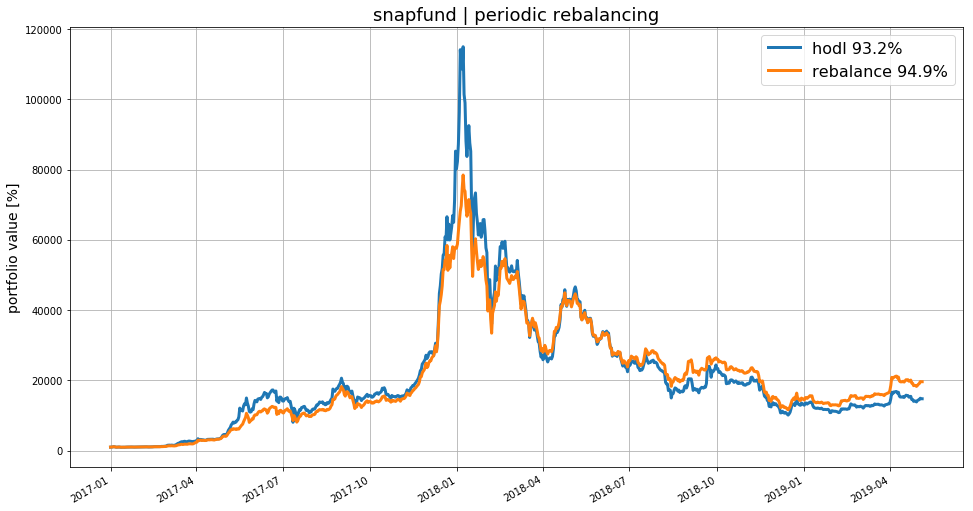

In [63]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(hodl_value, label='hodl {:.1f}%'.format(hodl_perf * 100), linewidth=3)
ax.plot(rb_value, label='rebalance {:.1f}%'.format(rb_perf * 100), linewidth=3)
ax.grid(True, 'both')
ax.set_ylabel('portfolio value [%]', fontsize=14)
ax.legend(fontsize=16)
ax.set_title('snapfund | periodic rebalancing', fontsize=18)
fig.autofmt_xdate();